In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

### load data ###

In [2]:
df_f = pd.read_csv('flights_clean.csv')
df_f.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime'],axis=1, inplace=True)
df_f.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,1,3,4,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,1,3,4,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,1,3,4,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [3]:
df_f.shape

(1928366, 13)

In [4]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928366 entries, 0 to 1928365
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   UniqueCarrier      object 
 4   FlightNum          int64  
 5   TailNum            object 
 6   ActualElapsedTime  float64
 7   CRSElapsedTime     float64
 8   ArrDelay           float64
 9   DepDelay           float64
 10  Origin             object 
 11  Dest               object 
 12  Distance           int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 191.3+ MB


In [5]:
# convert FlightNum to object type
df_f['FlightNum'] = df_f['FlightNum'].astype('str')

In [6]:
# convert Month to object type
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

df_f['Month']=df_f['Month'].map(months)

In [7]:
display(df_f['DayOfWeek'].unique())

array([4, 5, 6, 7, 1, 2, 3])

In [8]:
# convert DayOfWeek to object type
week={1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}

df_f['DayOfWeek']=df_f['DayOfWeek'].map(week)

In [9]:
df_f.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


### abans de processar les dades:
+ vaig a quedarme nomes amb vols de 40 min o mes de durada
+ vaig a quedarme amb aeroports d'Origen o Desti que apareguin mes de 50 vegades

In [10]:
flights = df_f[df_f['ActualElapsedTime']>=40]

In [11]:
flights.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [12]:
origin_freq = flights['Origin'].value_counts()

In [13]:
origin_airports = origin_freq[origin_freq > 50].index
origin_airports

Index(['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'IAH', 'PHX', 'LAS', 'EWR', 'DTW',
       ...
       'SCE', 'LYH', 'OXR', 'DLG', 'CDC', 'PSG', 'BTM', 'YKM', 'ADK', 'TEX'],
      dtype='object', length=281)

In [14]:
flights_1 = flights.loc[flights['Origin'].isin(origin_airports)] 

In [15]:
flights_1.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [16]:
dest_freq = flights_1['Dest'].value_counts()

In [17]:
dest_airports = dest_freq[dest_freq > 50].index
dest_airports

Index(['ORD', 'ATL', 'DFW', 'DEN', 'LAX', 'EWR', 'LAS', 'PHX', 'SFO', 'IAH',
       ...
       'IYK', 'ADQ', 'WRG', 'BTM', 'CDC', 'LWS', 'RFD', 'SLE', 'ALO', 'PLN'],
      dtype='object', length=280)

In [18]:
flights_2 = flights_1.loc[flights_1['Dest'].isin(dest_airports)] 

In [19]:
flights_2.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,Jan,3,Thu,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,Jan,3,Thu,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,Jan,3,Thu,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,Jan,3,Thu,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,Jan,3,Thu,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [20]:
flights_2['Origin'].value_counts()

ATL    130814
ORD    124195
DFW     94597
DEN     73439
LAX     58071
        ...  
PSG        59
BTM        58
YKM        55
ADK        53
TEX        52
Name: Origin, Length: 281, dtype: int64

In [21]:
# agafo un subset de tot el dataframe
flights_3 = flights_2.sample(n=20000,replace=False,random_state=123)

In [22]:
flights_3.shape

(20000, 13)

### Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

1. Vaig a utilitzar la funció get_dummies per encodejar el Mes i el dia del Mes

In [23]:
months_week = pd.get_dummies(flights_3[['Month','DayOfWeek']],prefix='',prefix_sep='')

In [24]:
months_week.head(2)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
895506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1377772,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


2. els dies del mes i la resta de columnas numeriques les deixaré igual per ara
3. vaig a mirar les columnes que no son numeriques

In [25]:
categorical_cols = flights_3[['UniqueCarrier','TailNum','Origin','Dest']]

In [26]:
categorical_cols.head()

,UniqueCarrier,TailNum,Origin,Dest
895506,WN,N234WN,BUR,LAS
1377772,9E,91769E,ATL,HOU
1589672,MQ,N637MQ,ORD,XNA
901035,WN,N906WN,CRP,HOU
1697100,MQ,N719MQ,RDU,LGA


In [27]:
categorical_cols.nunique()

UniqueCarrier      20
TailNum          4779
Origin            266
Dest              270
dtype: int64

+ hi han 20 UniqueCarrrier i mes de 270 diferents aeroports d'Origen i/o de Desti i aprox 5000 TailNum diferents

In [28]:
categorical_cols['UniqueCarrier'].unique()

array(['WN', '9E', 'MQ', 'YV', 'AA', 'CO', 'FL', 'B6', 'OO', 'AS', 'XE',
       'DL', 'F9', 'UA', 'EV', 'US', 'OH', 'NW', 'HA', 'AQ'], dtype=object)

4. vaig a utilitzar get_dummies per encodejar els UniqueCarrier ja que no surten masses columnes

In [29]:
carriers = pd.get_dummies(flights_3['UniqueCarrier'])

In [30]:
carriers.head(2)

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
895506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1377772,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


5. La resta de variables categoriques utilitzare LabelEncoder

In [31]:
# creem LabelEncoder per les variables categoriques
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
categoricals_transform = categorical_cols.drop(['UniqueCarrier'],axis=1)
categoricals_transform = categoricals_transform[['Origin','Dest','TailNum']].apply(le.fit_transform)

In [33]:
categoricals_transform.head()

,Origin,Dest,TailNum
895506,37,138,748
1377772,13,116,140
1589672,185,267,2925
901035,57,116,4222
1697100,208,145,3437


6. columnes numeriques

In [34]:
numeric_cols = flights_3[['DayofMonth','ActualElapsedTime','ArrDelay','DepDelay','Distance']]

In [35]:
numeric_cols.head(2)

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance
895506,15,61.0,14.0,18.0,223
1377772,11,142.0,30.0,25.0,696


7. unifiquem totes les dades en un unic dataframe

In [36]:
dfa = pd.concat([numeric_cols,categoricals_transform,months_week,carriers],axis=1)

In [37]:
dfa.head()

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
895506,15,61.0,14.0,18.0,223,37,138,748,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1377772,11,142.0,30.0,25.0,696,13,116,140,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1589672,1,90.0,78.0,88.0,522,185,267,2925,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
901035,19,103.0,114.0,61.0,187,57,116,4222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1697100,13,91.0,-7.0,7.0,431,208,145,3437,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


8. aplico una Normalització de les variables numeriques

In [38]:
#from sklearn.preprocessing import StandardScaler

In [39]:
cols2norm=['DayofMonth','ActualElapsedTime','ArrDelay','DepDelay','Distance','Origin','Dest','TailNum']

In [40]:
res = dfa.drop(cols2norm,axis=1)
numerical = dfa[cols2norm]

In [41]:
from scipy.cluster.vq import whiten

In [42]:
X1 = pd.DataFrame(whiten(numerical),columns=numerical.columns,index= numerical.index)

In [43]:
X1.describe().round(2)
# totes tenen std = 1

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,1.80,1.86,0.72,0.78,1.34,1.76,1.81,1.77
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.11,0.56,-0.89,0.11,0.09,0.00,0.00,0.00
25%,0.91,1.11,0.15,0.22,0.60,0.93,0.93,0.91
50%,1.83,1.61,0.41,0.44,1.07,1.89,1.89,1.73
75%,2.63,2.29,0.94,0.95,1.74,2.57,2.63,2.64
max,3.54,8.95,25.47,27.12,8.66,3.68,3.63,3.49


In [44]:
X_features = pd.concat([X1,res],axis=1)

In [45]:
X_features.head()

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
895506,1.712638,0.846845,0.239329,0.327638,0.389146,0.513657,1.863905,0.545945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1377772,1.255934,1.971344,0.512848,0.455052,1.214555,0.180474,1.566761,0.102182,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1589672,0.114176,1.249443,1.333406,1.601784,0.910916,2.568283,3.606251,2.134879,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
901035,2.169341,1.429919,1.948824,1.110328,0.326324,0.791309,1.566761,3.081524,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1697100,1.484286,1.263326,-0.119665,0.127415,0.752116,2.887583,1.958451,2.508574,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


+ anem a aplicar un PCA per quedarnos amb 3 components principals i veure la variancia 

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_features)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.18769197 0.18245806 0.10389298]


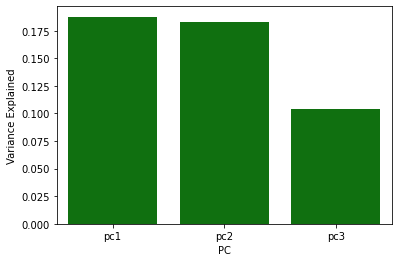

In [47]:
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':['pc1','pc2','pc3']})

sns.barplot(x='PC',y='Variance Explained', data=pca_df, color="green")
plt.show()

In [48]:
pca_df.head()

,Variance Explained,PC
0,0.187692,pc1
1,0.182458,pc2
2,0.103893,pc3


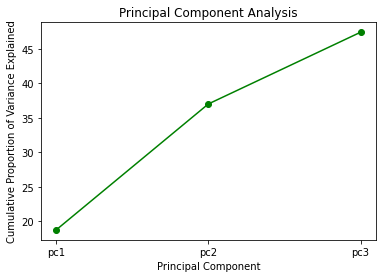

In [49]:
plt.plot(100*np.cumsum(pca.explained_variance_ratio_),marker = 'o',color='green')
plt.xticks(np.arange(3),['pc1','pc2','pc3'])
plt.title('Principal Component Analysis')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [50]:
round(np.cumsum(pca.explained_variance_ratio_)[-1]*100,1)

47.4

+ els 3 primers components representen el 47% de la variança de les dades

In [51]:
X_features['pca1'] = principalComponents[:,0]
X_features['pca2'] = principalComponents[:,1] 
X_features['pca3'] = principalComponents[:,2]

+ anem a visualitzar el resultats

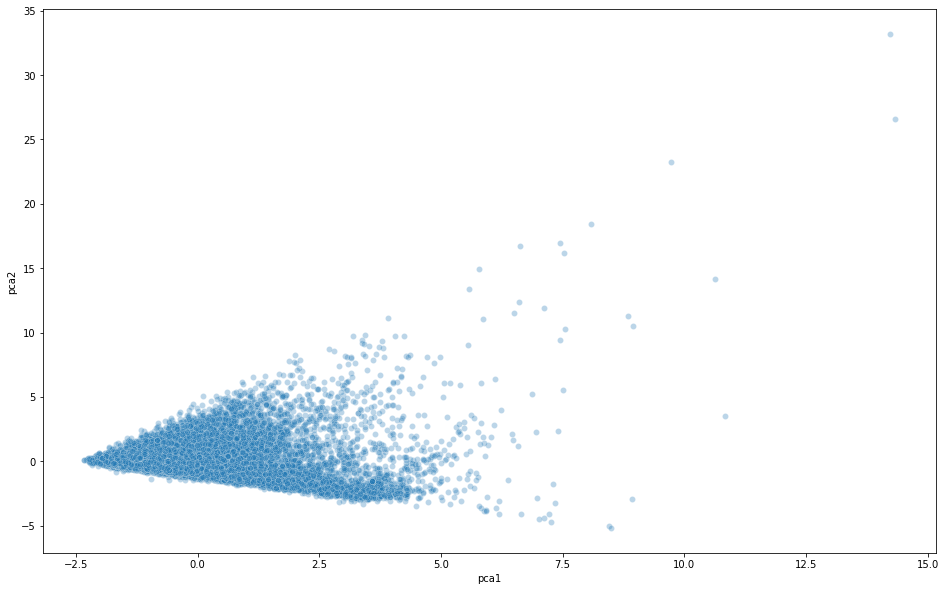

In [52]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="pca1", y="pca2", data=X_features, alpha=0.3)
plt.show()

+ de la grafica veiem que si visualitzem nomes els primers 2 components no podem veure cap cluster/grups

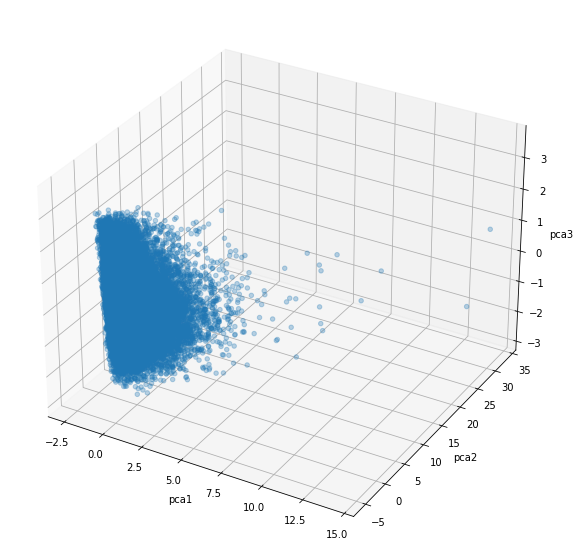

In [53]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=X_features["pca1"],ys=X_features["pca2"], zs=X_features["pca3"],alpha=0.3)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

+ de la grafica en 3D veiem que si visualitzem els primers 3 components tampoc es pot veure clarament les diferents agrupacions/clusters. 

+ apliquem l'algorisme de K-means

In [54]:
from sklearn.cluster import KMeans

In [55]:
n_clusters = np.arange(1,11)
inercias = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300}
for cluster in n_clusters:    
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs,random_state=123)
    knn.fit(X_features[['pca1','pca2','pca3']])
    err = knn.inertia_
    print(cluster,err)
    inercias.append(err)


1 101294.0358440805
2 74768.43261882104
3 53854.98897097168
4 41431.46706533311
5 36145.81104785539
6 31218.219166456794
7 28639.956708259604
8 26138.661906274818
9 24350.270294126138
10 22691.923172799674


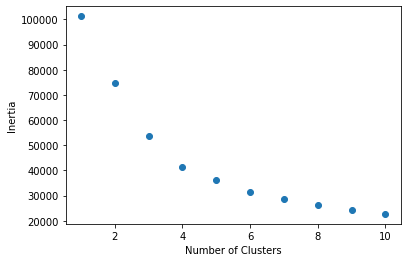

In [56]:
# Elbow plot #
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [57]:
# A partir del plot "elbow" podriem dir que existeixen 4 clusters 

### Nivell 2

- Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [77]:
X = X_features.drop(['pca1','pca2','pca3'],axis=1)

In [74]:
Z = linkage(X,method='ward')

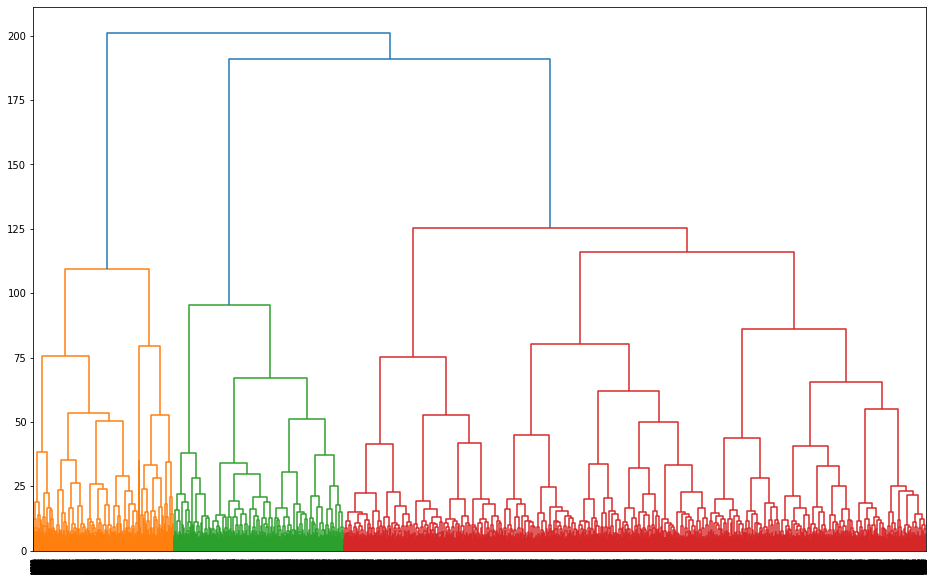

In [75]:
plt.figure(figsize=(16,10))
dendrogram(Z)
plt.show()

In [78]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

[0 0 1 ... 1 0 2]


In [83]:
X['labels']= labels

In [84]:
X.head()

,DayofMonth,ActualElapsedTime,ArrDelay,DepDelay,Distance,Origin,Dest,TailNum,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,labels
895506,1.712638,0.846845,0.239329,0.327638,0.389146,0.513657,1.863905,0.545945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1377772,1.255934,1.971344,0.512848,0.455052,1.214555,0.180474,1.566761,0.102182,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1589672,0.114176,1.249443,1.333406,1.601784,0.910916,2.568283,3.606251,2.134879,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
901035,2.169341,1.429919,1.948824,1.110328,0.326324,0.791309,1.566761,3.081524,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
1697100,1.484286,1.263326,-0.119665,0.127415,0.752116,2.887583,1.958451,2.508574,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Nivell3

- Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

'The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 
'

In [90]:
from sklearn.metrics import silhouette_score

In [95]:
silhouette_coefficients = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs,random_state= 123)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)    
    silhouette_coefficients.append(score)
    print("For n_clusters =", k,"The average silhouette_score is :", score)


For n_clusters = 2 The average silhouette_score is : 0.1591121682011655
For n_clusters = 3 The average silhouette_score is : 0.1739295768838289
For n_clusters = 4 The average silhouette_score is : 0.19063038686201875
For n_clusters = 5 The average silhouette_score is : 0.14058507443816426
For n_clusters = 6 The average silhouette_score is : 0.13470311494968196
For n_clusters = 7 The average silhouette_score is : 0.11709886787201726
For n_clusters = 8 The average silhouette_score is : 0.11658549705652684
For n_clusters = 9 The average silhouette_score is : 0.11336499588744728


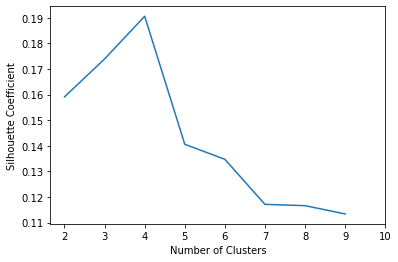

In [96]:
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

+ amb 4 cluster tenim el valor del coef Siluete mes alt
